# Peer-graded Assignment: Capstone Project
***
_Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve._<BR>
<BR>
_This capstone project will be graded by your peers. This capstone project is worth 70% of your total grade._ <br>
_The project will be completed over the course of 2 weeks.  Week 1 submissions will be worth 30% whereas week 2 submissions will be worth 40% of your total grade._
***
## The Battle of Neighborhoods (Week 1 Submission)

_Create a new repository on your Github account and name it Coursera_Capstone._<BR>
_Now, start a Jupyter Notebook using any platform that you are comfortable with and do the following:_<BR>
    <BR>
_Write some markdown to explain that this notebook will be mainly used for the capstone project._<BR>
        <BR>
_Import the pandas library as pd._<BR>
_Import the Numpy library as np._<BR>
            <BR>
_Print the following the statement: Hello Capstone Project Course!_<BR>
                <BR>
_Push the Notebook to your Github repository and submit a link to the notebook on your Github repository._<BR>

***
**This Jupyter Notebook will be used to hold the Applied Data Science Capstone Project Materials.**<BR>
**This is the final project to complete the IBM Data Science Professional certificate.**
***

In [28]:
import pandas as pd
import numpy as np

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


***
[Applied Data Science Capstone Project Notebook on Github](https://github.com/keyottabarber/Coursera_Capstone/blob/master/Capstone%20Project%20Notebook.ipynb)

## For this week, you will required to submit the following:

### A description of the problem and a discussion of the background. (15 marks)


### A description of the data and how it will be used to solve the problem. (15 marks)
A dataset with the required information could not be located, therefore a small dataset was manually created using Google Maps to indentify neighborhood names and GPS coordinates.<br>
This data was then imported from CSV format into a Pandas dataframe. <br>
After importing the data, Geopy was used to create a base map for Charlotte, North Carolina. Folium was used to place the neighborhoods into the base map. <br>
Foursquare location data was used to identify the most popular venues in each area. <br>
K-Means clustering was then applied to group the neighborhoods according to their simularity to each other.

# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 2)

# Week 2 Submission
For the second week, the final deliverables of the project will be:

1. A link to your Notebook on your Github repository, showing your code. (15 marks)<br>
[NBviewer Link to Github Repository - (Used to preserve in-line map views](https://jupyter-jsc.fz-juelich.de/nbviewer/github/keyottabarber/Coursera_Capstone/blob/master/Capstone%20Project%20Notebook.ipynb)
***
2. A full report consisting of all of the following components (15 marks):<br>


- **Introduction:** Discuss the business problem and who would be interested in this project.<br>
- **Data:** Describe the data that will be used to solve the problem and the source of the data.<br>
- **Methodology:** The main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.<br>
- **Results:** Discuss the results.<br>
- **Discussion:** Discuss any observations you noted and any recommendations you can make based on the results.<br>
- **Conclusion:** Conclude the report.<br>
3. Your choice of a presentation or blogpost. (10 marks)<BR>


# 0.0 - Table of Contents
[1.0 - Set Development Environment](#1.0---Set-Development-Environment)<BR>
[2.0 - Load external dataset](#2.0---Load-External-Dataset)<BR>
[3.0 - Create Base Map](#3.0---Create-Base-Map)<BR>
[4.0 - Get Nearby Venues and process data](#4.0---Get-Nearby-Venues-For-Our-Neighborhoods)<BR>
[5.0 - Cluster Neighborhoods Using K-Means](#5.0---Cluster-Neighborhoods-Using-K-Means)<BR>

# 1.0 - Set Development Environment
## Before we get the data and start exploring it, let's download all the dependencies that we will need and set the environment.
***
[Back to TOC](#0.0---Table-of-Contents)

In [29]:
# Matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

#convert an address into latitude and longitude values
!pip install geopy 
from geopy.geocoders import Nominatim 

import json # library to handle JSON files
import requests 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Libraries imported.


# 2.0 - Load External Dataset 
## Neighborhood Names and GPS Coordinates
***
[Back to TOC](#0.0---Table-of-Contents)

In [59]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_602eafb641564befa8ef0bddc1d06d9e = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_602eafb641564befa8ef0bddc1d06d9e = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_602eafb641564befa8ef0bddc1d06d9e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='uFyq0DcaLfe6HLVEoRD6rJbS4yDehxNJRHC0BenKAwpZ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_602eafb641564befa8ef0bddc1d06d9e)

body = client_602eafb641564befa8ef0bddc1d06d9e.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-zdkeag9vgigfvn',Key='sclt.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()
#df_data_2[["latitude", "longitude"]] = df_data_1[["latitude", "longitude"]].apply(pd.to_numeric)

df_data_3

,Neighborhood,Latitude,Longitude
0,Belmont,35.228498,-80.820533
1,Biddleville,35.244668,-80.857104
2,Cherry,35.211191,-80.830472
3,Dilworth,35.205974,-80.852310
4,Elizabeth,35.214095,-80.819952
5,First Ward,35.226395,-80.834404
6,Fourth Ward,35.230943,-80.841794
7,Greenwood,35.241831,-80.840049
8,Lockwood,35.241594,-80.829456
9,Phifer Heights,35.235135,-80.818139


# 3.0 - Create Base Map 
## Now, let's create a base map for Charlotte, North Carolina USA and add our neighboorhoods using GeoPy.
geopy is a Python client for several popular geocoding web services.
geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.<BR>
[GeoPy - Python Geocoding Toolbox Project Page](https://pypi.org/project/geopy/)
***
[Back to TOC](#0.0---Table-of-Contents)

In [31]:
address = 'Charlotte, North Carolina'
geolocator = Nominatim(user_agent="nc_explorer_")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Charlotte, North Carolina are 35.2272086, -80.8430827.


### Add neighborhoods to base map

In [32]:
map_charlotte = folium.Map(location=[latitude,longitude],zoom_start=13)

for lat,lng,neighborhood in zip(df_data_3['Latitude'],df_data_3['Longitude'],df_data_3['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_charlotte)

map_charlotte

# 4.0 - Get Nearby Venues For Our Neighborhoods 
## Now, let's find nearby venues for our group of Charlotte, NC neighborhoods using Foursquare location data.
[Foursquare](https://foursquare.com/)
***
[Back to TOC](#0.0---Table-of-Contents)

In [33]:
CLIENT_ID = 'UYMQKDZHLNXEGN5B0UHU3ULMGOSSODXT2KN4AGM0L2R3VR0H' # your Foursquare ID
CLIENT_SECRET = 'AXLMGPJ5IET1Q2WCV5K5GUVFQ4CPD1QNERHY4VUJGISBGAN5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UYMQKDZHLNXEGN5B0UHU3ULMGOSSODXT2KN4AGM0L2R3VR0H
CLIENT_SECRET:AXLMGPJ5IET1Q2WCV5K5GUVFQ4CPD1QNERHY4VUJGISBGAN5


Function that gathers venue data within a specified radios of the supplied latitude and longitude:<BR>

adius is set to 500 meters this will limit results to venues within this many meters of the specified location. Defaults to a city-wide area. Only valid for requests that use categoryId or query. The maximum supported radius is currently 100,000 meters.

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run **_getNearbyVenues_** function on Pandas dataframe containing neighborhood names and GPS coordinates and assign the output to **_charlotte_venues_**. There are 19 defined neighborhoods in the **_df_data_3_** dataframe.

In [35]:
charlotte_venues = getNearbyVenues(names=df_data_3['Neighborhood'],
                                   latitudes=df_data_3['Latitude'],
                                   longitudes=df_data_3['Longitude']
                                  )

Belmont
Biddleville
Cherry
Dilworth
Elizabeth
First Ward
Fourth Ward
Greenwood
Lockwood
Phifer Heights
Second Ward
Southend
Third Ward
Wesley Heights
Wilmore
Villa Heights
Greenville
Brookhill
Plaza Midwood


**_charlotte_venues_** dataframe has 7 columns and 372 rows.

In [36]:
print(charlotte_venues.shape)
charlotte_venues

(375, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Belmont,35.228498,-80.820533,Sweet Lew's Barbeque,35.228113,-80.821162,Southern / Soul Food Restaurant
1,Belmont,35.228498,-80.820533,Catawba Brewing Charlotte,35.225048,-80.821365,Brewery
2,Belmont,35.228498,-80.820533,Siggy’s Good Food,35.227915,-80.820914,Restaurant
3,Belmont,35.228498,-80.820533,Ace No. 3,35.227848,-80.820958,Burger Joint
4,Belmont,35.228498,-80.820533,Now Toasted,35.225283,-80.821452,Food Truck
...,...,...,...,...,...,...,...
370,Plaza Midwood,35.223746,-80.801713,Krazy Fish,35.219504,-80.799999,Seafood Restaurant
371,Plaza Midwood,35.223746,-80.801713,Miller's Elite Fitness,35.223245,-80.798079,Sports Club
372,Plaza Midwood,35.223746,-80.801713,planBreathe,35.220486,-80.803329,Spa
373,Plaza Midwood,35.223746,-80.801713,McDonald's,35.220052,-80.802574,Fast Food Restaurant


**_charlotte_venues_** is grouped by neighborhood showing the number of venues in that area (500 meter radius).

In [37]:
charlotte_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Belmont,9,9,9,9,9,9
Biddleville,4,4,4,4,4,4
Brookhill,26,26,26,26,26,26
Cherry,42,42,42,42,42,42
Dilworth,3,3,3,3,3,3
Elizabeth,28,28,28,28,28,28
First Ward,20,20,20,20,20,20
Fourth Ward,57,57,57,57,57,57
Greenville,17,17,17,17,17,17


In [38]:
print('There are {} unique venue categories in the charlotte_venues dataframe.'.format(len(charlotte_venues['Venue Category'].unique())))

There are 135 unique venue categories in the charlotte_venues dataframe.


**_One hot encoding_** is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [39]:
# one hot encoding
charlotte_onehot = pd.get_dummies(charlotte_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
charlotte_onehot['Neighborhood'] = charlotte_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [charlotte_onehot.columns[-1]] + list(charlotte_onehot.columns[:-1])
charlotte_onehot = charlotte_onehot[fixed_columns]

charlotte_onehot.head()

,Neighborhood,Advertising Agency,American Restaurant,Antique Shop,Arcade,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,...,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Belmont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Belmont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Belmont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Belmont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Belmont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
charlotte_onehot.shape

(375, 136)

Grouping rows by neighborhood and calculating the mean of the frequency of occurrence for each category

In [41]:
charlotte_grouped = charlotte_onehot.groupby('Neighborhood').mean().reset_index()
charlotte_grouped

,Neighborhood,Advertising Agency,American Restaurant,Antique Shop,Arcade,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,...,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Belmont,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000
1,Biddleville,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000
2,Brookhill,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000
3,Cherry,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.02381,0.000000,0.00000,0.000000,0.00000,0.023810
4,Dilworth,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000
5,Elizabeth,0.000000,0.035714,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000
6,First Ward,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.050000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.05000,0.000000,0.00000,0.000000
7,Fourth Ward,0.000000,0.070175,0.000000,0.0,0.000000,0.000000,0.000000,0.017544,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.035088,0.00000,0.000000,0.00000,0.000000
8,Greenville,0.000000,0.058824,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.058824,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000
9,Greenwood,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.166667,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000


In [42]:
charlotte_grouped.shape

(19, 136)

Indentifying the top venue categories for each neighborhood.

In [43]:
num_top_venues = 5

for area in charlotte_grouped ['Neighborhood']:
    print("----"+area+"----")
    temp = charlotte_grouped[charlotte_grouped['Neighborhood'] == area].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Belmont----
                             venue  freq
0                    Deli / Bodega  0.11
1               Athletics & Sports  0.11
2  Southern / Soul Food Restaurant  0.11
3                       Skate Park  0.11
4                       Food Truck  0.11


----Biddleville----
                  venue  freq
0                  Park  0.25
1   Fried Chicken Joint  0.25
2  Gym / Fitness Center  0.25
3                  Café  0.25
4             Nightclub  0.00


----Brookhill----
                    venue  freq
0                 Brewery  0.08
1             Coffee Shop  0.08
2  Furniture / Home Store  0.08
3               Pet Store  0.08
4              Steakhouse  0.04


----Cherry----
                      venue  freq
0               Pizza Place  0.10
1            Sandwich Place  0.07
2  Mediterranean Restaurant  0.05
3        Mexican Restaurant  0.05
4         Mobile Phone Shop  0.05


----Dilworth----
                   venue  freq
0                   Bank  0.33
1                   Pa

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
##### num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = charlotte_grouped['Neighborhood']

for ind in np.arange(charlotte_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(charlotte_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Belmont,Food Truck,Southern / Soul Food Restaurant,Dance Studio,Deli / Bodega,Restaurant
1,Biddleville,Gym / Fitness Center,Park,Café,Fried Chicken Joint,Yoga Studio
2,Brookhill,Coffee Shop,Pet Store,Brewery,Furniture / Home Store,Pool Hall
3,Cherry,Pizza Place,Sandwich Place,Boutique,Fast Food Restaurant,Mediterranean Restaurant
4,Dilworth,Park,Bank,Massage Studio,Yoga Studio,Furniture / Home Store
5,Elizabeth,Sandwich Place,Spa,Pet Store,Cajun / Creole Restaurant,Shipping Store
6,First Ward,Hotel,Cocktail Bar,Creperie,Farmers Market,Food
7,Fourth Ward,American Restaurant,Restaurant,Irish Pub,Theater,Lounge
8,Greenville,Mexican Restaurant,Nightclub,Bar,Comedy Club,Cocktail Bar
9,Greenwood,Music Venue,Gas Station,Beer Garden,Cocktail Bar,Volleyball Court


# 5.0 - Cluster Neighborhoods Using K-Means  
## Now, let's find the optimal number of k-clusters and apply the algorithm to the base map.
[SciKit-Learn K-Means Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
***
[Back to TOC](#0.0---Table-of-Contents)

**_K-Means Clustering_** is an unsupervised machine learning algorithm. The objective of K-means is to group similar data points together and discover underlying patterns. <BR>

**_Silhouette Analysis_** will be used to determine the optimal number of K clusters per dataset, 
Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

In [46]:

import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [47]:
max_range = 10
charlotte_grouped_cluster = charlotte_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score
indices = []
scores = []
for kclusters in range(2, max_range) :
    
    # Run k-means
    kmc = charlotte_grouped_cluster
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score
    score = silhouette_score(kmc, kmeans)
    
    # Append the index and score
    indices.append(kclusters)
    scores.append(score)

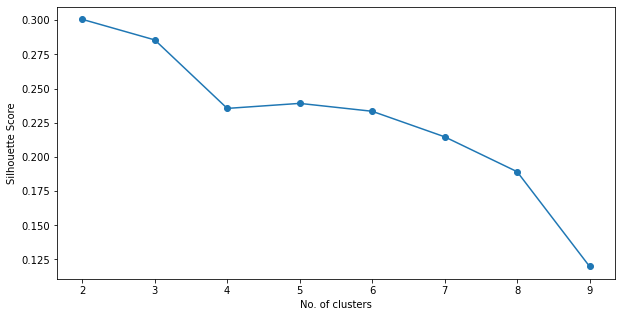

In [48]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

Plotted Silhouette Score indicates that the optimal number of clusters is two.

In [49]:
k=2
charlotte_clustering = df_data_3.drop(['Neighborhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(charlotte_clustering)
kmeans.labels_
df_data_3.insert(0, 'C Labels', kmeans.labels_)

In [55]:
df_data_3.head()

,C Labels,Neighborhood,Latitude,Longitude
0,1,Belmont,35.228498,-80.820533
1,0,Biddleville,35.244668,-80.857104
2,1,Cherry,35.211191,-80.830472
3,0,Dilworth,35.205974,-80.852310
4,1,Elizabeth,35.214095,-80.819952


In [56]:
map_clusters = folium.Map(location=[latitude,longitude],zoom_start=13)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighborhood, cluster in zip(df_data_3['Latitude'], df_data_3['Longitude'], df_data_3['Neighborhood'], df_data_3['C Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [57]:
df_data_3.loc[df_data_3['C Labels'] == 0, df_data_3.columns[[1] + list(range(5, df_data_3.shape[1]))]]

,Neighborhood
1,Biddleville
3,Dilworth
10,Second Ward
11,Southend
12,Third Ward
13,Wesley Heights
14,Wilmore
17,Brookhill


In [58]:
df_data_3.loc[df_data_3['C Labels'] == 1, df_data_3.columns[[1] + list(range(5, df_data_3.shape[1]))]]

,Neighborhood
0,Belmont
2,Cherry
4,Elizabeth
5,First Ward
6,Fourth Ward
7,Greenwood
8,Lockwood
9,Phifer Heights
15,Villa Heights
16,Greenville


In [54]:
df_data_3.loc[df_data_3['C Labels'] == 2, df_data_3.columns[[1] + list(range(5, df_data_3.shape[1]))]]

,Neighborhood
